## Problem Statement:
### To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [8]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

No Null Values


In [10]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
df.shape

(8124, 23)

### Preprocessing

In [12]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [13]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


 "Class" column is taken as the target and rest of the columns as considered as features for the ML models


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [16]:
# importing neccessary models together
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [17]:
#Logical Regression 
lg_model=LogisticRegression()
lg_model.fit(X_train,y_train)
y_pred=lg_model.predict(X_test)


cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]

p_lr=pd.DataFrame([acc,Mis_class])
p_lr.columns=['Logistic Regression'] 

print('Accuracy Score:',acc)
cm

Accuracy Score: 0.95079950799508


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[409,  24],
       [ 16, 364]], dtype=int64)

In [18]:
# Random Forest Method 
rf_model=RandomForestClassifier(n_estimators=200,max_depth=50,random_state=42,criterion='entropy')
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]

p_rf=pd.DataFrame([acc,Mis_class])
p_rf.columns=['Random Forest Method']

print('Accuracy score :',acc)
cm

Accuracy score : 1.0


array([[433,   0],
       [  0, 380]], dtype=int64)

In [19]:
# KNN Model

acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)


Text(0, 0.5, 'accuracy')

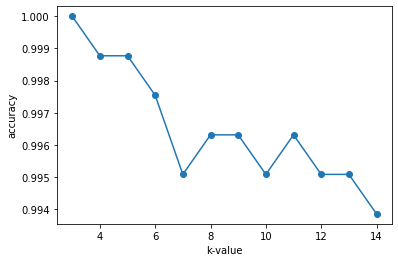

In [20]:
#Optimum Value of K
plt.plot(neighbors,acc_values,"o-")
plt.xlabel('k-value')
plt.ylabel('accuracy')

optimum value of k=2

In [27]:
# KNN 
classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
acc=accuracy_score(y_test,y_pred)

p_knn=pd.DataFrame([acc,Mis_class])
p_knn.columns=['K-NN Model']
print('Accuracy Score :',acc)
cm

Accuracy Score : 1.0


array([[433,   0],
       [  0, 380]], dtype=int64)

In [26]:
# SVM 
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)

acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]

p_svml=pd.DataFrame([acc,Mis_class])
p_svml.columns=['Linear SVM']

print('Accuracy Score :',accuracy_score(y_test,y_pred))
cm

Accuracy Score : 0.976629766297663


array([[426,   7],
       [ 12, 368]], dtype=int64)

In [25]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

Mis_class=cm[0,1]+cm[1,0]
print('Accuracy score :',acc)
cm

Accuracy score : 0.976629766297663


array([[426,   7],
       [ 12, 368]], dtype=int64)

All the models have almost 100% accuracy